In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as lg
import scipy.special
import time
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

## Networks and Random Processes: Problem sheet 1
# 1.1 SRW


In [28]:
# 1) C 
def SRW_closed(p, tmax, N, L):
    q = 1-p
    X = np.random.rand(N,tmax)
    X[X<p] = 1
    X[X!=1] = -1
    Y = np.zeros((N,tmax))
    for i in range(0, N):
        X[i][0] = 1 #start at one
        Y[i][0] = 1
        for j in range(1,tmax):
            if Y[i][j-1] < 1:
                Y[i][j-1] = 1
            if Y[i][j-1] > L:
                Y[i][j-1] = L  
            Y[i][j] = Y[i][j-1] + X[i][j]
        if Y[i][tmax-1] < 1:
            Y[i][tmax-1] = 1
        if Y[i][tmax-1] > L:
            Y[i][tmax-1] = L      
    return X, Y

In [147]:
TT = SRW_closed(0.8,14,1,5)
TT

(array([[ 1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,
          1.]]),
 array([[1., 1., 2., 3., 4., 5., 5., 5., 4., 5., 5., 5., 5., 5.]]))

In [151]:
TT[1]

array([[1., 1., 2., 3., 4., 5., 5., 5., 4., 5., 5., 5., 5., 5.]])

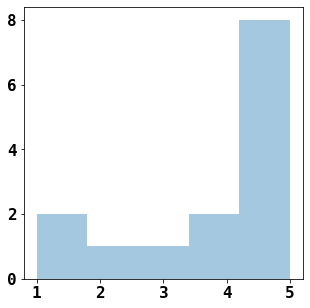

In [161]:
plt.figure(figsize = (5,5))
sns.distplot(TT[1],bins = 'auto', kde = False)

In [29]:
N = 500
p = 0.7
tmax = 100
L = 10
SS = SRW_closed(p,tmax,N,L)



In [30]:
statdenom = sum((p/(1-p))**k for k in [0,1,2,3,4,5,6,7,8,9])
stat = [(p/(1-p))**k for k in [0,1,2,3,4,5,6,7,8,9]]
statnorm = [500*stat[kk]/statdenom for kk in [0,1,2,3,4,5,6,7,8,9]]
stat

[1.0,
 2.333333333333333,
 5.444444444444443,
 12.703703703703699,
 29.64197530864196,
 69.1646090534979,
 161.38408779149506,
 376.56287151348846,
 878.6467001981397,
 2050.175633795659]

In [194]:
statnorm

[0.13939002082741725,
 0.32524338193064023,
 0.758901224504827,
 1.7707695238445964,
 4.131795555637391,
 9.640856296487245,
 22.49533135847023,
 52.48910650309721,
 122.47458184056013,
 285.7740242946403]

In [166]:
SS[1][:,9]

array([ 4.,  3.,  2.,  7.,  8.,  6.,  5.,  8.,  3.,  8.,  6.,  6.,  4.,
        4.,  6.,  6.,  1., 10.,  4.,  5.,  6.,  4.,  4., 10.,  6.,  3.,
        9.,  6.,  5.,  5.,  4.,  8.,  8.,  2.,  6.,  3.,  3.,  2.,  6.,
        4.,  5.,  4.,  6.,  1.,  7.,  5.,  6.,  7.,  8.,  8.,  8.,  7.,
        8.,  5.,  2.,  5.,  5.,  6.,  8.,  8.,  3.,  8.,  8.,  1.,  2.,
        8.,  4.,  8.,  6.,  7., 10.,  2.,  3.,  6.,  7.,  4.,  7.,  4.,
        4.,  3., 10.,  4.,  6.,  7.,  4.,  8.,  8.,  5.,  8.,  8.,  4.,
        1.,  8., 10.,  2.,  7.,  9.,  2.,  3.,  7.,  6.,  8.,  8.,  6.,
        8.,  1., 10.,  8.,  4.,  6.,  3.,  2.,  8.,  8.,  4.,  2.,  3.,
        4.,  7.,  6.,  8., 10.,  5.,  6.,  6.,  6.,  4.,  4.,  2.,  6.,
        8.,  5.,  3., 10.,  7.,  5.,  8.,  2.,  6.,  8.,  3.,  4.,  4.,
        8.,  6.,  8.,  4.,  2., 10.,  8.,  4.,  8.,  3.,  8.,  2.,  4.,
        3.,  4.,  4.,  6.,  4.,  6.,  4.,  8., 10.,  7.,  8.,  3.,  6.,
        5.,  4., 10., 10.,  4.,  5.,  1.,  8.,  4.,  4.,  5.,  3

In [31]:
dist = np.zeros(10)
for j in range(0,10):
    nom = 0
    for i in range(1,500):
        if SS[1][i,99] ==j+1:
            nom += 1
    dist[j] = nom
dist

array([  0.,   0.,   1.,   0.,   4.,  10.,  13.,  51., 126., 294.])

In [253]:
nom = 0
for i in range(1,500):
    if SS[1][i,99] ==4:
        nom += 1
nom

2

In [251]:
test = []
for j in range(500):
    test.append(j)
test

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [235]:
SS[1][3,99]

9.0

In [119]:
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 16}
plt.rc('font', **font)

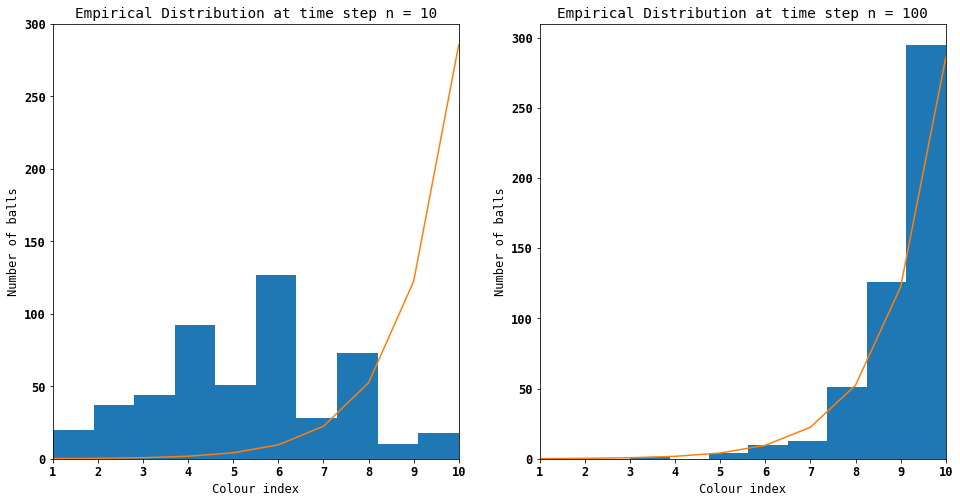

In [35]:
plt.figure(figsize = (16,8))
plt.rc('font', **font)
plt.subplot(1,2,1)
plt.hist(SS[1][:,9],bins = 10)
plt.plot([1,2,3,4,5,6,7,8,9,10],statnorm)
plt.xlim(1,10)
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.xlabel('Colour index')
plt.ylabel('Number of balls')
plt.title('Empirical Distribution at time step n = 10')

plt.subplot(1,2,2)
plt.title('Empirical Distribution at time step n = 100')
plt.hist(SS[1][:,99],bins=8)
plt.plot([1,2,3,4,5,6,7,8,9,10],statnorm)
plt.xlim(1,10)
plt.xlabel('Colour index')
plt.ylabel('Number of balls')
plt.savefig('task11a.pdf')

In [256]:
statdenom2 = sum((0.6/(1-0.6))**k for k in [0,1,2,3,4,5,6,7,8,9])
stat2 = [(0.6/(1-0.6))**k for k in [0,1,2,3,4,5,6,7,8,9]]
statnorm2 = [50*stat2[kk]/statdenom2 for kk in [0,1,2,3,4,5,6,7,8,9]]
statnorm3 = [500*stat2[kk]/statdenom2 for kk in [0,1,2,3,4,5,6,7,8,9]]

In [257]:
N2 = 1
p2 = 0.6
tmax2 = 500
L2 = 10
LL = SRW_closed(p2,tmax2,N2,L2)

In [124]:
Z = np.zeros(shape=(10,500))
for i in range(1,10):
    for j in range(0,500):
        if Y[j] == i:
            Z[i][j] = 1 
            
ZZ50 = np.zeros(10)
for k in range(1,10):
    ZZ50[k] = sum(Z[k,0:50])
    
ZZ500 = np.zeros(10)
for k in range(1,10):
    ZZ500[k] = sum(Z[k,:])
    
print(ZZ500)
print(ZZ50)

[ 0.  6. 13. 18. 28. 39. 40. 53. 72. 92.]
[ 0.  1.  2.  3.  2.  1.  1.  4.  8. 13.]


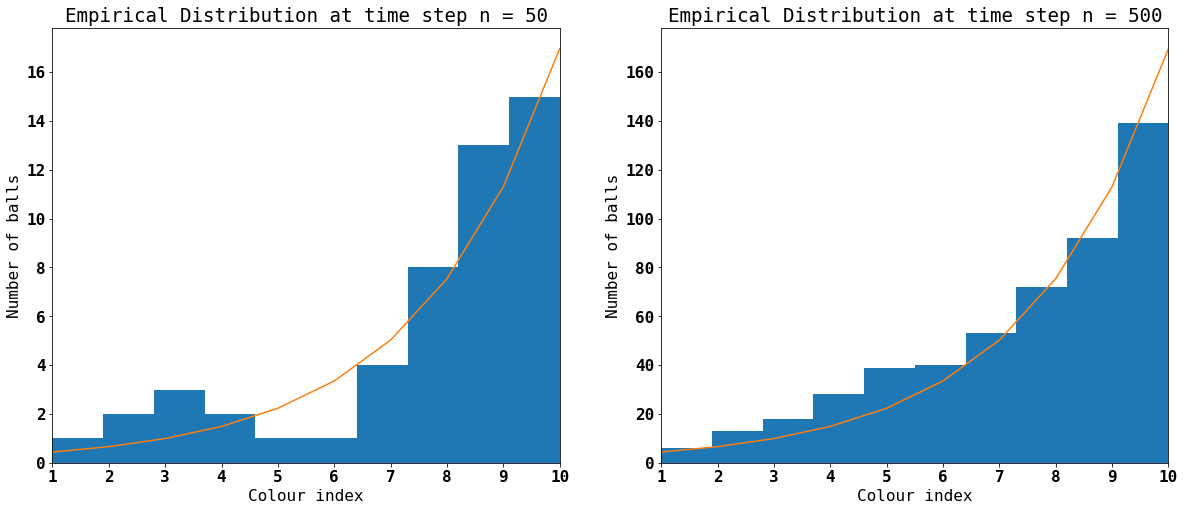

In [261]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.hist(Y[0:50])
plt.plot([1,2,3,4,5,6,7,8,9,10],statnorm2)
plt.xlim(1,10)
plt.xlabel('Colour index')
plt.ylabel('Number of balls')
plt.title('Empirical Distribution at time step n = 50')

plt.subplot(1,2,2)
plt.title('Empirical Distribution at time step n = 500')
plt.hist(Y)
plt.plot([1,2,3,4,5,6,7,8,9,10],statnorm3)
plt.xlim(1,10)
plt.xlabel('Colour index')
plt.ylabel('Number of balls')
#bins = len(np.unique(SS[1][:,99])))
plt.savefig('task11b.pdf') 

In [ ]:
plt.savefig('asdasda.pdf') #If it cuts off my axis, google it.

# task 1.3

In [3]:
#fitness probability with reinforcement paramter

k = 500
X0 = np.ones(k)
T = 5000
gamma = 0
fitness = np.ones(k)
XN = np.ones((T, k))

current_state = []
current_state.extend(range(k))
for j in range(1,T):
    denominator = sum([fitness[kk]*(kk)**gamma for kk in current_state])
    selection_prob = [fitness[kk]*(kk)**gamma/denominator for kk in current_state]
    r = np.random.choice(len(current_state), p = selection_prob) #non uniform random choice from range(len(current))
    newBall = current_state[r]
    XN[j:,newBall] = XN[j-1,newBall]+1
    current_state.append(newBall)


In [11]:
k = 500
X0 = np.ones(k)
T = 5000
gamma = 0
fitness = np.ones(k+T)
XN = np.ones((T, k))

current_state = []
current_state.extend(range(k+T))
for j in range(1,T):
    denominator = sum([fitness[kk]*(kk)**gamma for kk in current_state[0:498+j]])
    selection_prob = [fitness[kk]*(kk)**gamma/denominator for kk in current_state[0:498+j]]
    r = np.random.choice(len(current_state[0:498+j]), p = selection_prob) #non uniform random choice from range(len(current))
    newBall = current_state[r]
#    XN[j:,newBall] = XN[j-1,newBall]+1
#    current_state[k+j] = newBall

In [ ]:
XN.sort(axis =1) #try without this

Text(0.5, 1, 'Polya urn')

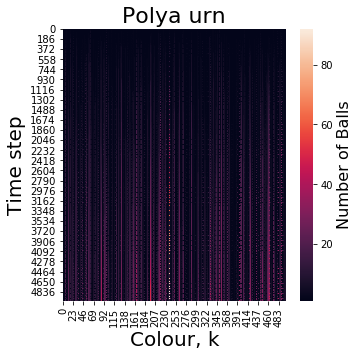

In [20]:
plt.figure(figsize = (5,5))
pcm = sns.heatmap(XN,cbar_kws={'label': r'Number of Balls'})
pcm.figure.axes[-1].yaxis.label.set_size(16)
plt.ylabel('Time step', fontsize = 20)
plt.xlabel('Colour, k', fontsize = 20)
plt.title('Polya urn', fontsize = 22)

In [57]:
T = 0
for j in range(1,100):
    T = T+1
    if j == 20:
        t1 = T
    if j == 60:
        t2 = T

60

In [44]:
def Polya_urn(k,X0,T,gamma,fitness):
    if len(fitness) != k:
        error('Not a good fitness choice, not the right length')
    XN = np.ones((T, k))
    current_state = []
    current_state.extend(range(k))
    for j in range(1,T):
        denominator = sum([fitness[kk]*(kk)**gamma for kk in current_state])
        selection_prob = [fitness[kk]*(kk)**gamma/denominator for kk in current_state]
        r = np.random.choice(len(current_state), p = selection_prob) #non uniform random choice from range(len(current))
        newBall = current_state[r]
        XN[j:,newBall] = XN[j-1,newBall]+1
        current_state.append(newBall)
        if j == 50:
            XN_1 = XN
        if j == 200:
            XN_2 = XN
    return XN , XN_1, XN_2

In [45]:
k = 500
X0 = np.ones(k)
T = 500
gamma = 0
fitness = np.ones(k)

Results = Polya_urn(k,X0,T,gamma,fitness)



In [56]:
Results[1]

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [3., 2., 2., ..., 1., 5., 2.],
       [3., 2., 2., ..., 1., 5., 2.],
       [3., 2., 2., ..., 1., 5., 2.]])

In [46]:
Results[0] is Results[2]

True

Text(0.5, 1, 'Polya urn')

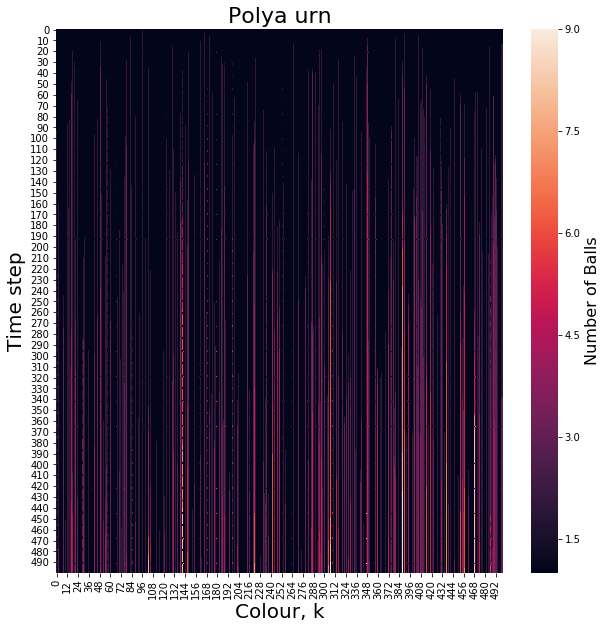

In [34]:
plt.figure(figsize = (10,10))
pcm = sns.heatmap(Results[1],cbar_kws={'label': r'Number of Balls'})
pcm.figure.axes[-1].yaxis.label.set_size(16)
plt.ylabel('Time step', fontsize = 20)
plt.xlabel('Colour, k', fontsize = 20)
plt.title('Polya urn', fontsize = 22)

In [4]:
def PolyUrn(K, T, gamma, fitness):
    '''Function that returns the State Space of the k colour polyurn up to time T. 
    Each colour has a fitness (given by array) and all colours have same reinforcement parameter'''
    
    XN = np.ones((T, K))
    for j in range(1,T):
        denominator = sum([fitness[kk]*XN[j,kk]**gamma for kk in range(K)])
        selection_prob = [fitness[kk]*(XN[j,kk])**gamma/denominator for kk in range(K)]
        newBall = np.random.choice(K, p = selection_prob) #non uniform random choice from range(len(current))
        XN[j:,newBall] = XN[j-1,newBall]+1
    XN.sort(axis =1) #try without this
    
    return XN

In [39]:
K = 500
X0 = np.ones(K)
T = 80000
gamma = [0,0.5,1,1.5]
fitness = np.ones(K)
Poly1 = PolyUrn(K,T,gamma[0],fitness)
Poly2 = PolyUrn(K,T,gamma[1],fitness)
Poly3 = PolyUrn(K,T,gamma[2],fitness)
Poly4 = PolyUrn(K,T,gamma[3],fitness)

In [40]:
ecdf_XN11 = ECDF(Poly1[T-1,:])
ecdf_XN21 = ECDF(Poly2[T-1,:])
ecdf_XN31 = ECDF(Poly3[T-1,:])
ecdf_XN41 = ECDF(Poly4[T-1,:])

ecdf_XN12 = ECDF(Poly1[20000-1,:])
ecdf_XN22 = ECDF(Poly2[20000-1,:])
ecdf_XN32 = ECDF(Poly3[20000-1,:])
ecdf_XN42 = ECDF(Poly4[20000-1,:])

ecdf_XN13 = ECDF(Poly1[8000-1,:])
ecdf_XN23 = ECDF(Poly2[8000-1,:])
ecdf_XN33 = ECDF(Poly3[8000-1,:])
ecdf_XN43 = ECDF(Poly4[8000-1,:])



In [8]:
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 12}

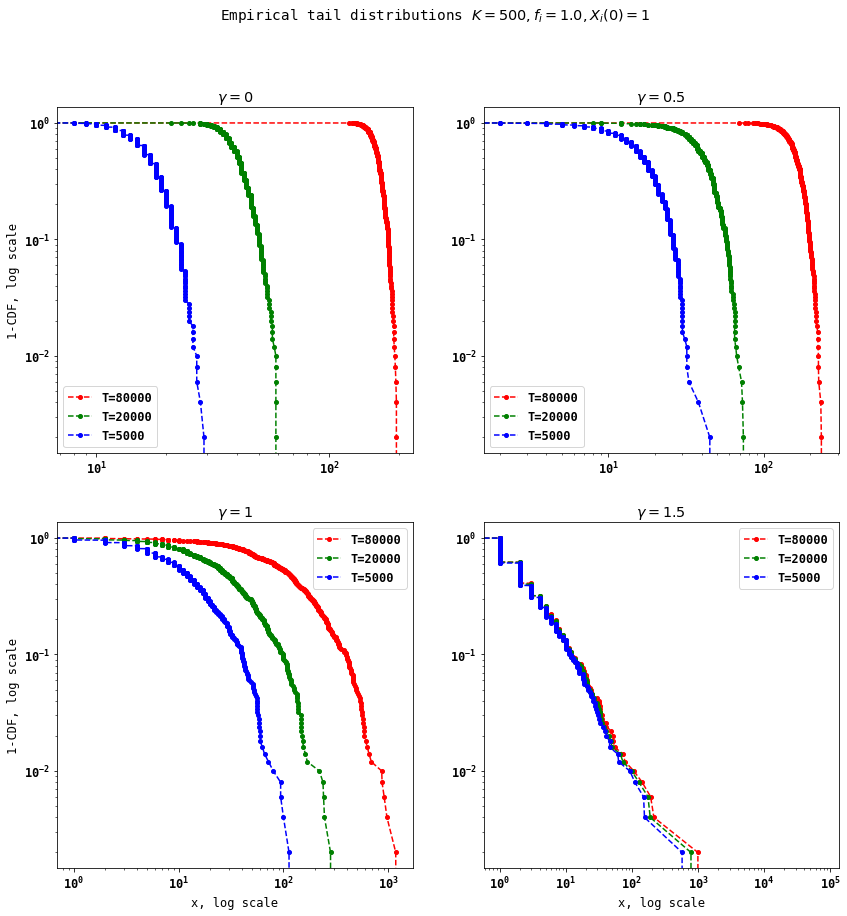

In [42]:
plt.rc('font', **font)
plt.figure(figsize=(14,14))
# plt.plot(bins, tail,linestyle='--', marker="o",ms = 4, color='r',label = 'T={}'.format(T))
plt.subplot(2,2,1)
plt.suptitle(r'Empirical tail distributions $K = {}, f_i = {}, X_i(0) = 1$'.format(K, fitness[0]))
plt.plot(ecdf_XN11.x, np.ones(len(ecdf_XN11.y))-ecdf_XN11.y, linestyle='--', marker="o",ms = 4, color='r',label = 'T={}'.format(T))
plt.plot(ecdf_XN12.x, np.ones(len(ecdf_XN12.y))-ecdf_XN12.y, linestyle='--', marker="o",ms = 4, color='g',label = 'T=20000'.format(T))
plt.plot(ecdf_XN13.x, np.ones(len(ecdf_XN13.y))-ecdf_XN13.y, linestyle='--', marker="o",ms = 4, color='b',label = 'T=5000'.format(T))
plt.yscale('log')
plt.xscale('log')
plt.title(r'$γ  = {}$'.format(gamma[0]))
plt.ylabel("1-CDF, log scale")
plt.legend()




# plt.plot(bins, tail,linestyle='--', marker="o",ms = 4, color='r',label = 'T={}'.format(T))
plt.subplot(2,2,2)
plt.plot(ecdf_XN21.x, np.ones(len(ecdf_XN21.y))-ecdf_XN21.y, linestyle='--', marker="o",ms = 4, color='r',label = 'T={}'.format(T))
plt.plot(ecdf_XN22.x, np.ones(len(ecdf_XN22.y))-ecdf_XN22.y, linestyle='--', marker="o",ms = 4, color='g',label = 'T=20000'.format(T))
plt.plot(ecdf_XN23.x, np.ones(len(ecdf_XN23.y))-ecdf_XN23.y, linestyle='--', marker="o",ms = 4, color='b',label = 'T=5000'.format(T))
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title(r'$ γ ={}$'.format( gamma[1]))



# plt.plot(bins, tail,linestyle='--', marker="o",ms = 4, color='r',label = 'T={}'.format(T))
plt.subplot(2,2,3)
plt.plot(ecdf_XN31.x, np.ones(len(ecdf_XN31.y))-ecdf_XN31.y, linestyle='--', marker="o",ms = 4, color='r',label = 'T={}'.format(T))
plt.plot(ecdf_XN32.x, np.ones(len(ecdf_XN32.y))-ecdf_XN32.y, linestyle='--', marker="o",ms = 4, color='g',label = 'T=20000'.format(T))
plt.plot(ecdf_XN33.x, np.ones(len(ecdf_XN33.y))-ecdf_XN33.y, linestyle='--', marker="o",ms = 4, color='b',label = 'T=5000'.format(T))
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylabel("1-CDF, log scale")
plt.title(r'$ γ ={}$'.format( gamma[2]))
plt.xlabel('x, log scale')


plt.subplot(2,2,4)
plt.plot(ecdf_XN41.x, np.ones(len(ecdf_XN41.y))-ecdf_XN41.y, linestyle='--', marker="o",ms = 4, color='r',label = 'T={}'.format(T))
plt.plot(ecdf_XN42.x, np.ones(len(ecdf_XN42.y))-ecdf_XN42.y, linestyle='--', marker="o",ms = 4, color='g',label = 'T=20000'.format(T))
plt.plot(ecdf_XN43.x, np.ones(len(ecdf_XN43.y))-ecdf_XN43.y, linestyle='--', marker="o",ms = 4, color='b',label = 'T=5000'.format(T))
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title(r'$ γ ={}$'.format( gamma[3]))
plt.xlabel('x, log scale')
plt.savefig('Task131.pdf')

In [43]:
ecdf_NXN11 = ECDF(Poly1[T-1,:]/(T+K))
ecdf_NXN21 = ECDF(Poly2[T-1,:]/(T+K))
ecdf_NXN31 = ECDF(Poly3[T-1,:]/(T+K))
ecdf_NXN41 = ECDF(Poly4[T-1,:]/(T+K))

ecdf_NXN12 = ECDF(Poly1[20000-1,:]/(20000+K))
ecdf_NXN22 = ECDF(Poly2[20000-1,:]/(20000+K))
ecdf_NXN32 = ECDF(Poly3[20000-1,:]/(20000+K))
ecdf_NXN42 = ECDF(Poly4[20000-1,:]/(20000+K))

ecdf_NXN13 = ECDF(Poly1[8000-1,:]/(5000+K))
ecdf_NXN23 = ECDF(Poly2[8000-1,:]/(5000+K))
ecdf_NXN33 = ECDF(Poly3[8000-1,:]/(5000+K))
ecdf_NXN43 = ECDF(Poly4[8000-1,:]/(5000+K))

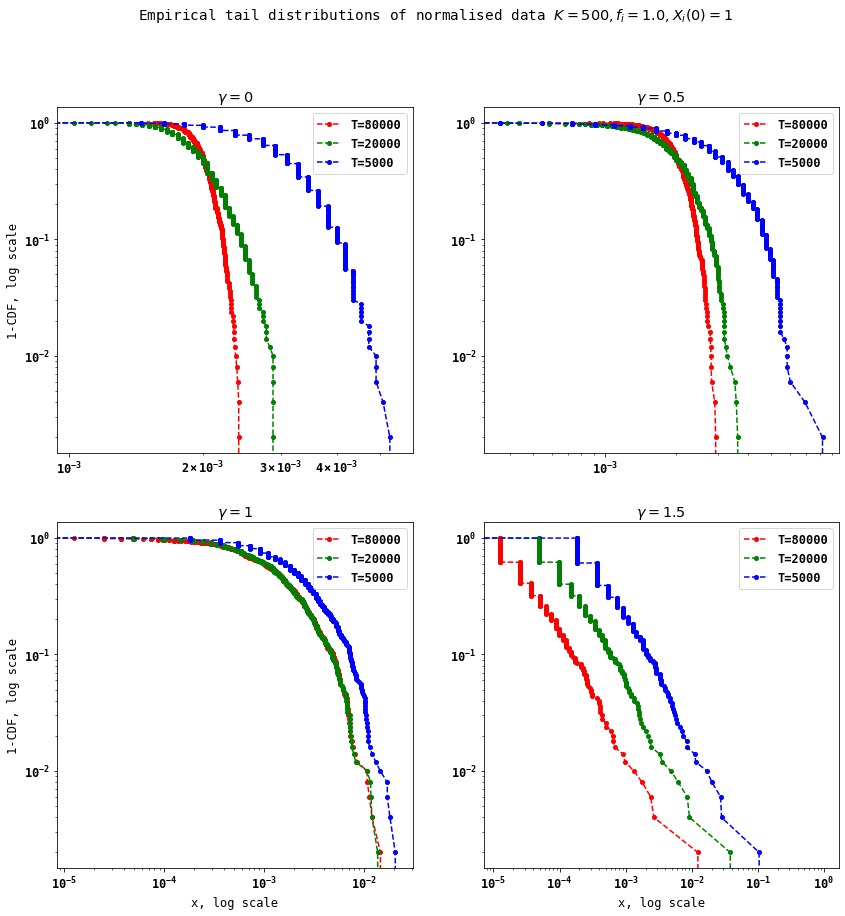

In [45]:
plt.rc('font', **font)
plt.figure(figsize=(14,14))
# plt.plot(bins, tail,linestyle='--', marker="o",ms = 4, color='r',label = 'T={}'.format(T))
plt.subplot(2,2,1)
plt.suptitle(r'Empirical tail distributions of normalised data $K = {}, f_i = {}, X_i(0) = 1$'.format(K, fitness[0]))
plt.plot(ecdf_NXN11.x, np.ones(len(ecdf_NXN11.y))-ecdf_NXN11.y, linestyle='--', marker="o",ms = 4, color='r',label = 'T={}'.format(T))
plt.plot(ecdf_NXN12.x, np.ones(len(ecdf_NXN12.y))-ecdf_NXN12.y, linestyle='--', marker="o",ms = 4, color='g',label = 'T=20000'.format(T))
plt.plot(ecdf_NXN13.x, np.ones(len(ecdf_NXN13.y))-ecdf_NXN13.y, linestyle='--', marker="o",ms = 4, color='b',label = 'T=5000'.format(T))
plt.yscale('log')
plt.xscale('log')
plt.title(r'$γ  = {}$'.format(gamma[0]))
plt.ylabel("1-CDF, log scale")
plt.legend()




# plt.plot(bins, tail,linestyle='--', marker="o",ms = 4, color='r',label = 'T={}'.format(T))
plt.subplot(2,2,2)
plt.plot(ecdf_NXN21.x, np.ones(len(ecdf_NXN21.y))-ecdf_NXN21.y, linestyle='--', marker="o",ms = 4, color='r',label = 'T={}'.format(T))
plt.plot(ecdf_NXN22.x, np.ones(len(ecdf_NXN22.y))-ecdf_NXN22.y, linestyle='--', marker="o",ms = 4, color='g',label = 'T=20000'.format(T))
plt.plot(ecdf_NXN23.x, np.ones(len(ecdf_NXN23.y))-ecdf_NXN23.y, linestyle='--', marker="o",ms = 4, color='b',label = 'T=5000'.format(T))
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title(r'$ γ ={}$'.format( gamma[1]))



# plt.plot(bins, tail,linestyle='--', marker="o",ms = 4, color='r',label = 'T={}'.format(T))
plt.subplot(2,2,3)
plt.plot(ecdf_NXN31.x, np.ones(len(ecdf_NXN31.y))-ecdf_NXN31.y, linestyle='--', marker="o",ms = 4, color='r',label = 'T={}'.format(T))
plt.plot(ecdf_NXN32.x, np.ones(len(ecdf_NXN32.y))-ecdf_NXN32.y, linestyle='--', marker="o",ms = 4, color='g',label = 'T=20000'.format(T))
plt.plot(ecdf_NXN33.x, np.ones(len(ecdf_NXN33.y))-ecdf_NXN33.y, linestyle='--', marker="o",ms = 4, color='b',label = 'T=5000'.format(T))
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylabel("1-CDF, log scale")
plt.title(r'$ γ ={}$'.format( gamma[2]))
plt.xlabel('x, log scale')


plt.subplot(2,2,4)
plt.plot(ecdf_NXN41.x, np.ones(len(ecdf_NXN41.y))-ecdf_NXN41.y, linestyle='--', marker="o",ms = 4, color='r',label = 'T={}'.format(T))
plt.plot(ecdf_NXN42.x, np.ones(len(ecdf_NXN42.y))-ecdf_NXN42.y, linestyle='--', marker="o",ms = 4, color='g',label = 'T=20000'.format(T))
plt.plot(ecdf_NXN43.x, np.ones(len(ecdf_NXN43.y))-ecdf_NXN43.y, linestyle='--', marker="o",ms = 4, color='b',label = 'T=5000'.format(T))
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title(r'$ γ ={}$'.format( gamma[3]))
plt.xlabel('x, log scale')
plt.savefig('Task132.pdf')

In [21]:
K = 500
X0 = np.ones(K)
T = 10000
gamma = [0,0.5,1,1.5]
fitness = np.ones(K)
for j in range(K+1):
    fitness[j-1] = np.expm1(-j)
#     fitness[j-1] = scipy.special.binom(K, j)


In [22]:
Fit1 = PolyUrn(K,T,gamma[0],fitness)
Fit2 = PolyUrn(K,T,gamma[1],fitness)
Fit3 = PolyUrn(K,T,gamma[2],fitness)
Fit4 = PolyUrn(K,T,gamma[3],fitness)

In [23]:
ecdf_Fit1 = ECDF(Fit1[T-1,:])
ecdf_Fit2 = ECDF(Fit2[T-1,:])
ecdf_Fit3 = ECDF(Fit3[T-1,:])
ecdf_Fit4 = ECDF(Fit4[T-1,:])

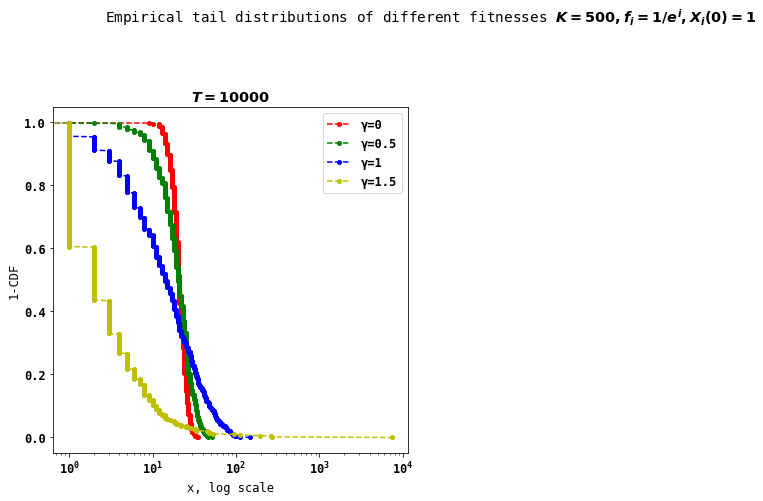

In [27]:
plt.rc('font', **font)
plt.figure(figsize=(14,14))
# plt.plot(bins, tail,linestyle='--', marker="o",ms = 4, color='r',label = 'T={}'.format(T))
plt.subplot(2,2,1)
plt.suptitle(r'Empirical tail distributions of different fitnesses $K = {}, f_i = 1/e^i, X_i(0) = 1$'.format(K ))
plt.plot(ecdf_Fit1.x, np.ones(len(ecdf_Fit1.y))-ecdf_Fit1.y, linestyle='--', marker="o",ms = 4, color='r',label = 'γ={}'.format(gamma[0]))
plt.plot(ecdf_Fit2.x, np.ones(len(ecdf_Fit2.y))-ecdf_Fit2.y, linestyle='--', marker="o",ms = 4, color='g',label = 'γ={}'.format(gamma[1]))
plt.plot(ecdf_Fit3.x, np.ones(len(ecdf_Fit3.y))-ecdf_Fit3.y, linestyle='--', marker="o",ms = 4, color='b',label = 'γ={}'.format(gamma[2]))
plt.plot(ecdf_Fit4.x, np.ones(len(ecdf_Fit4.y))-ecdf_Fit4.y, linestyle='--', marker="o",ms = 4, color='y',label = 'γ={}'.format(gamma[3]))
#plt.yscale('log')
plt.xscale('log')
plt.title(r'$T  = {}$'.format(T))
plt.ylabel("1-CDF")
plt.xlabel("x, log scale")
plt.legend()
plt.savefig("task133a.pdf")

In [36]:
K = 500
X0 = np.ones(K)
T = 10000
gamma = [0,0.5,1,1.5]
fitness = np.ones(K)
for j in range(K+1):
#   fitness[j-1] = np.expm1(-j)
     fitness[j-1] = scipy.special.binom(K, j)

In [37]:
Fit1 = PolyUrn(K,T,gamma[0],fitness)
Fit2 = PolyUrn(K,T,gamma[1],fitness)
Fit3 = PolyUrn(K,T,gamma[2],fitness)
Fit4 = PolyUrn(K,T,gamma[3],fitness)

In [38]:
ecdf_Fit1 = ECDF(Fit1[T-1,:])
ecdf_Fit2 = ECDF(Fit2[T-1,:])
ecdf_Fit3 = ECDF(Fit3[T-1,:])
ecdf_Fit4 = ECDF(Fit4[T-1,:])

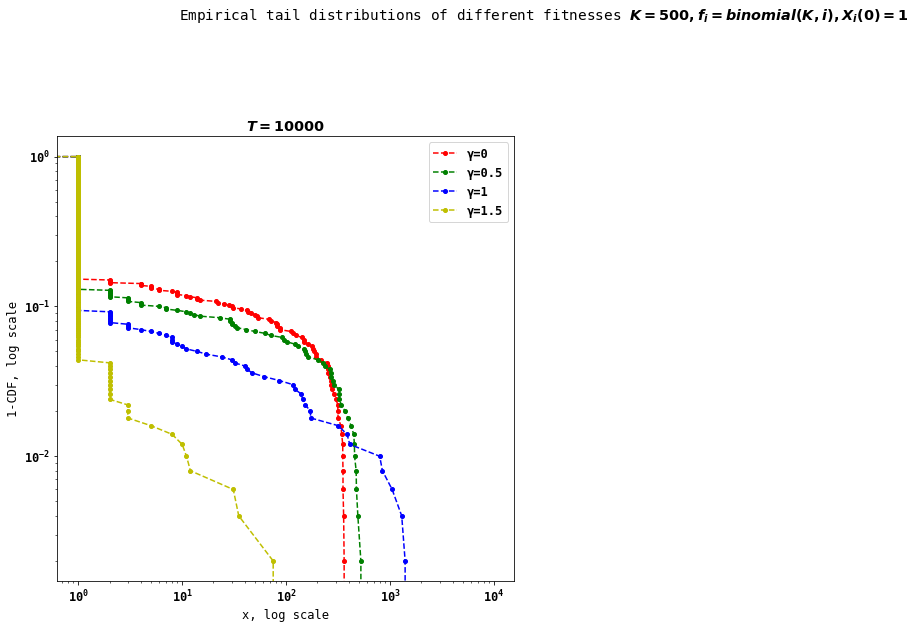

In [39]:
plt.rc('font', **font)
plt.figure(figsize=(18,18))
# plt.plot(bins, tail,linestyle='--', marker="o",ms = 4, color='r',label = 'T={}'.format(T))
plt.subplot(2,2,1)
plt.suptitle(r'Empirical tail distributions of different fitnesses $K = {}, f_i = binomial(K,i), X_i(0) = 1$'.format(K ))
plt.plot(ecdf_Fit1.x, np.ones(len(ecdf_Fit1.y))-ecdf_Fit1.y, linestyle='--', marker="o",ms = 4, color='r',label = 'γ={}'.format(gamma[0]))
plt.plot(ecdf_Fit2.x, np.ones(len(ecdf_Fit2.y))-ecdf_Fit2.y, linestyle='--', marker="o",ms = 4, color='g',label = 'γ={}'.format(gamma[1]))
plt.plot(ecdf_Fit3.x, np.ones(len(ecdf_Fit3.y))-ecdf_Fit3.y, linestyle='--', marker="o",ms = 4, color='b',label = 'γ={}'.format(gamma[2]))
plt.plot(ecdf_Fit4.x, np.ones(len(ecdf_Fit4.y))-ecdf_Fit4.y, linestyle='--', marker="o",ms = 4, color='y',label = 'γ={}'.format(gamma[3]))
plt.yscale('log')
plt.xscale('log')
plt.title(r'$T  = {}$'.format(T))
plt.ylabel("1-CDF, log scale")
plt.xlabel("x, log scale")
plt.legend()
plt.savefig("task133b.pdf")